In [10]:
import numpy as np
import matplotlib.pyplot as plt

**Linear Regression:**

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db


**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

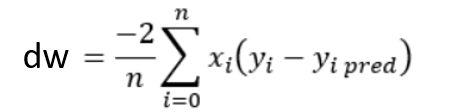


In [11]:
class Linear_Regression():

  def __init__(self,learning_rate,no_of_iteration):

    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration

  def fit(self,X,Y):
    # number of traning and number of feature
    self.m,self.n = X.shape

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing the gradient descent for multiple time.....

    for i in range(self.no_of_iteration):
      self.update_weights()

  def update_weights(self):

    Y_prediction = self.predict(self.X)


    dw = -(2*(self.X.T).dot(self.Y - Y_prediction))/self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,X):

    return X.dot(self.w)+self.b




In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/content/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [14]:
df.shape

(30, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [16]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [18]:
from numpy.random.mtrand import random_integers
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [19]:
model = Linear_Regression(learning_rate = 0.02,no_of_iteration=1000)

In [20]:
model.fit(x_train,y_train)

In [21]:
model.w[0]

9570.888860991548

In [22]:
model.b

24384.029598697263

In [23]:
test_data_prediction = model.predict(x_test)

In [24]:
test_data_prediction

array([36826.18511799, 34912.00734579, 67453.02947316, 59796.31838437,
       92337.34051174, 81809.36276465])

Text(0.5, 1.0, 'salary vs experience')

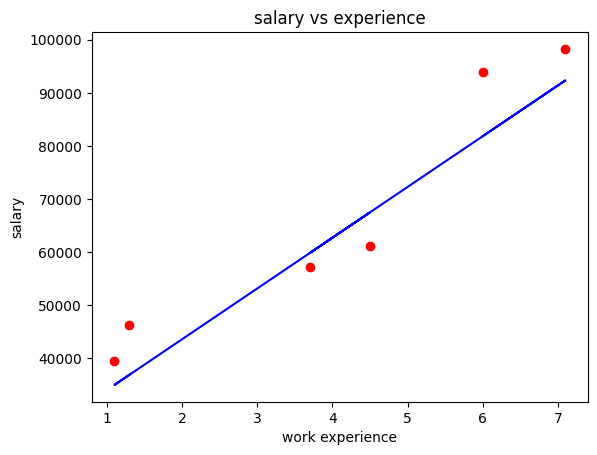

In [26]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,test_data_prediction,color = 'blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary vs experience')